# Sentiment Analysis

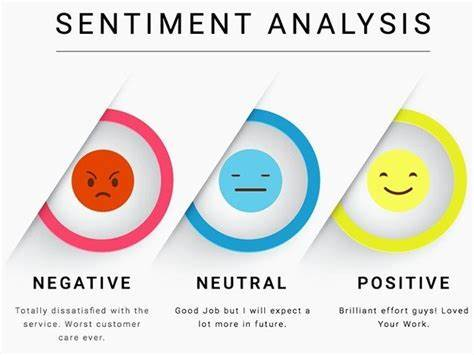

In [15]:
from IPython.display import Image
Image(filename='sent.jpg') 

# Importing Libraries

In [21]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter= "\t",quoting=3)

# Importing Set of stopwords

In [3]:
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91819\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
corpus= []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
X = cv.fit_transform(corpus).toarray()
y= dataset.iloc[:,1].values

# Spliting the dataset into test and train set 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.684

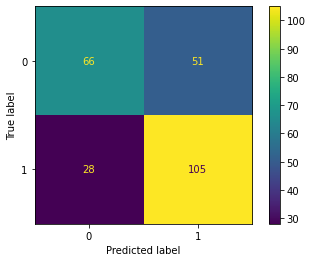

In [14]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

# Using Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

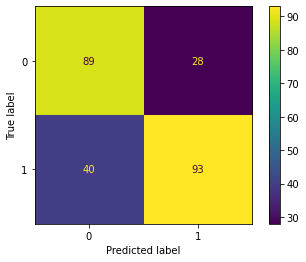

In [18]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.728

# Using KNN

In [23]:
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p =2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

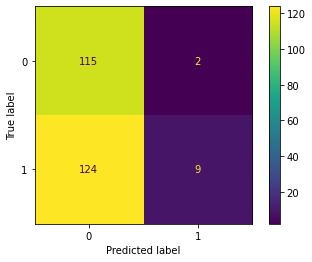

In [24]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.496

# Using SVM

In [27]:
SVM= SVC(kernel='linear',random_state=0)
SVM.fit(X_train,y_train)
# Predicting the Test set results
y_pred = SVM.predict(X_test)

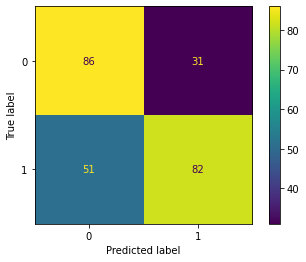

In [28]:
plot_confusion_matrix(SVM, X_test, y_test)  
plt.show()

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.672

# Kernal SVM

In [33]:
KSVM= SVC(kernel='rbf',random_state=0)
KSVM.fit(X_train,y_train)
# Predicting the Test set results
y_pred = KSVM.predict(X_test)

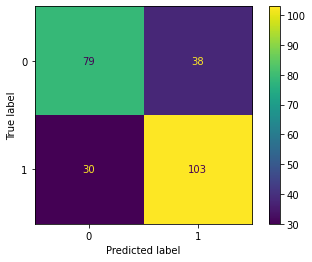

In [39]:
plot_confusion_matrix(KSVM, X_test, y_test)  
plt.show()

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.728

# Using Decision Tree Classifier

In [37]:
Decisiontree= DecisionTreeClassifier(criterion='entropy',random_state=0)
Decisiontree.fit(X_train,y_train)
# Predicting the Test set results
y_pred = Decisiontree.predict(X_test)

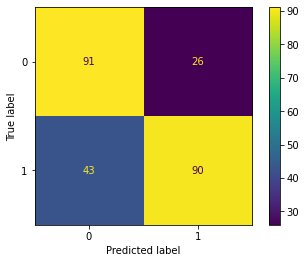

In [40]:
plot_confusion_matrix(Decisiontree, X_test, y_test)  
plt.show()

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.724

# Random Forest Classifier

In [43]:
RandomForest= RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0)
RandomForest.fit(X_train,y_train)
# Predicting the Test set results
y_pred = RandomForest.predict(X_test)

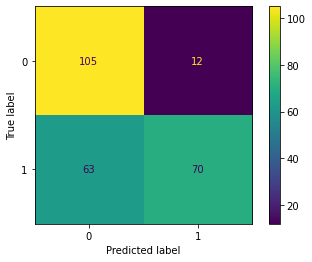

In [44]:
plot_confusion_matrix(RandomForest, X_test, y_test)  
plt.show()

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.7